# FreeSurfer's `recon-all` Differences

## Read Results

In [1]:
from brainprint.recon_all.read import read_results

context, results = read_results()

### Context

The `context` dataframe stores the contextual information about each anatomical scan.

In [2]:
context

,Subject ID,Sex,Dominant Hand,Date of Birth,Session ID,Session Time,Scan ID,Scan Description,Scan File Name,Inversion Time,Echo Time,Repetition Time,Spatial Resolution
Run ID,,,,,,,,,,,,,
58,149,M,L,1994-10-18,195,2021-09-30 17:28:17.421000+00:00,8571,T1w_MPRAGE_RL,sub-149_ses-202109301728_ce-corrected_T1w.nii.gz,1000.0,2.78,2400.0,"[0.8984375, 0.8984375, 0.89999997615814]"
59,148,M,R,1996-08-15,194,2021-09-29 16:55:45.501000+00:00,8516,T1w_MPRAGE_RL,sub-148_ses-202109291655_ce-corrected_T1w.nii.gz,1000.0,2.78,2400.0,"[0.8984375, 0.8984375, 0.89999997615814]"
60,147,M,R,1994-08-16,193,2021-09-29 15:47:21.348000+00:00,8502,T1w_MPRAGE_RL,sub-147_ses-202109291547_ce-corrected_T1w.nii.gz,1000.0,2.78,2400.0,"[0.8984375, 0.8984375, 0.89999997615814]"
61,149,M,L,1994-10-18,195,2021-09-30 17:28:17.421000+00:00,8568,T1w_MPRAGE_RL,sub-149_ses-202109301728_ce-uncorrected_T1w.ni...,1000.0,2.78,2400.0,"[0.8984375, 0.8984375, 0.89999997615814]"
62,147,M,R,1994-08-16,193,2021-09-29 15:47:21.348000+00:00,8469,T1w_MPRAGE_RL,sub-147_ses-202109291547_ce-uncorrected_T1w.ni...,1000.0,2.78,2400.0,"[0.8984375, 0.8984375, 0.89999997615814]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5238,2506,F,NaN,1993-11-24,3396,2022-03-31 09:22:07.107000+00:00,74630,T1w_MPRAGE_RL,sub-2506_ses-202203310922_ce-uncorrected_T1w.n...,1000.0,2.78,2400.0,"[0.8984375, 0.8984375, 0.89999997615814]"
5239,2479,M,NaN,1988-07-02,3333,2022-03-23 08:28:10.218000+00:00,73719,T1w_MPRAGE_RL,sub-2479_ses-202203230828_ce-corrected_T1w.nii.gz,1000.0,2.78,2400.0,"[0.8984375, 0.8984375, 0.89999997615814]"
5240,359,F,NaN,1997-06-19,3439,2022-04-05 16:00:21.240000+00:00,75252,T1w_MPRAGE_RL,sub-359_ses-202204051600_ce-corrected_T1w.nii.gz,1000.0,2.78,2400.0,"[0.8984375, 0.8984375, 0.89999997615814]"


### `recon-all` Anatomical Statistics

The `results` dataframe stores the anatomical statistics calculated by `recon-all` for each anatomical scan.

In [3]:
results

Hemisphere               Left                                   \
Region Name    G&S_cingul-Ant                                    
Metric      Average Thickness Folding Index Gray Matter Volume   
Run ID                                                           
58                      2.851          24.0             4764.0   
59                      2.755          29.0             5056.0   
60                      2.781          24.0             5466.0   
61                      2.813          29.0             4724.0   
62                      2.755          20.0             5185.0   
...                       ...           ...                ...   
5238                    2.412          14.0             3828.0   
5239                    2.600          18.0             4198.0   
5240                    2.774          22.0             4007.0   
5241                    2.485          25.0             4093.0   
5242                    2.617          20.0             3350.0   

Hemisphere                                           \
Region Name                                           
Metric      Integrated Rectified Gaussian Curvature   
Run ID                                                
58                                            0.024   
59                                            0.030   
60                                            0.023   
61                                            0.026   
62                                            0.022   
...                                             ...   
5238                                          0.020   
5239                                          0.021   
5240                                          0.028   
5241                                          0.026   
5242                                          0.024   

Hemisphere                                                                 \
Region Name                                                                 
Metric      Integrated Rectified Mean Curvature Intrinsic Curvature Index   
Run ID                                                                      
58                                        0.121                       2.2   
59                                        0.135                       3.2   
60                                        0.114                       2.6   
61                                        0.126                       2.3   
62                                        0.112                       2.4   
...                                         ...                       ...   
5238                                      0.104                       1.9   
5239                                      0.109                       1.9   
5240                                      0.127                       2.0   
5241                                      0.125                       2.2   
5242                                      0.116                       1.6   

Hemisphere                                                                  \
Region Name                               G&S_cingul-Mid-Ant                 
Metric      Surface Area Thickness StdDev  Average Thickness Folding Index   
Run ID                                                                       
58                1580.0            0.425              2.677           9.0   
59                1711.0            0.582              2.541          19.0   
60                1842.0            0.515              2.827           8.0   
61                1553.0            0.456              2.582          10.0   
62                1782.0            0.513              2.744           8.0   
...                  ...              ...                ...           ...   
5238              1554.0            0.481              2.364           7.0   
5239              1547.0            0.563              2.559           8.0   
5240              1316.0            0.523              2.734          13.0   
5241         

## Distinct Acquisition Protocols

In [4]:
context["Corrected"] = context["Scan File Name"].str.contains("ce-corrected")

In [5]:
context["Spatial Resolution"] = context["Spatial Resolution"].apply(lambda values: [round(float(value), 2) for value in values[1:-1].split(",")]).astype(str)

In [6]:
ACQUISITION_GROUPING = ["Inversion Time", "Echo Time", "Repetition Time", "Corrected", "Spatial Resolution"]
scan_parameter_counts = context.groupby(ACQUISITION_GROUPING).size().reset_index().rename(columns={0: "Count"}).sort_values("Count", ascending=False)
scan_parameter_counts.head()

,Inversion Time,Echo Time,Repetition Time,Corrected,Spatial Resolution,Count
21,1000.0,2.78,2400.0,False,"[0.9, 0.9, 0.9]",742
24,1000.0,2.78,2400.0,True,"[0.9, 0.9, 0.9]",737
13,1000.0,2.14,2400.0,False,"[0.7, 0.7, 0.7]",569
37,1100.0,2.88,2530.0,True,"[1.0, 1.0, 1.0]",215
10,900.0,2.84,1750.0,True,"[0.6, 0.6, 0.6]",99


## Differences Calculation

In [8]:
import numpy as np
import swifter
import pandas as pd
from itertools import combinations
from sklearn.preprocessing import StandardScaler


def calculate_difference(results: pd.DataFrame, run_1: int, run_2: int) -> np.array:
    return results.loc[run_1].to_numpy() - results.loc[run_2].to_numpy()

def check_same_subject(context: pd.DataFrame, run_1: int, run_2: int) -> bool:
    try:
        return context.loc[run_1, "Subject ID"] == context.loc[run_2, "Subject ID"]
    except AssertionError:
        print(f"Runs {run_1} and {run_2} raised AssertionError!")

def calculate_differences(results: pd.DataFrame, context: pd.DataFrame, sample_size: int = 100000) -> pd.DataFrame:
    run_combinations = pd.Series(combinations(results.index, 2))#.sample(sample_size)    
    values = run_combinations.swifter.apply(lambda runs: calculate_difference(results, runs[0], runs[1])).reset_index(drop=True)
    same_subject = run_combinations.swifter.apply(lambda runs: check_same_subject(context, runs[0], runs[1]))
    index = pd.MultiIndex.from_tuples(run_combinations)
    same_subject.index = index
    differences = pd.DataFrame.from_dict(dict(zip(index, values))).T
    differences.columns = results.columns
    differences.index.names = "Run 1", "Run 2"    
    return differences, same_subject

In [17]:
import matplotlib.pyplot as plt

common_protocols = "The Base (uncorrected)", "The Base (corrected)", "HCP"
differences = pd.DataFrame(columns=["Squared Euclidean Distance", "Same Subject", "Protocol"])
for rating, protocol in enumerate(common_protocols):
    run_mask = (context["Inversion Time"] == scan_parameter_counts.iloc[rating]["Inversion Time"]) & \
               (context["Repetition Time"] == scan_parameter_counts.iloc[rating]["Repetition Time"]) & \
               (context["Echo Time"] == scan_parameter_counts.iloc[rating]["Echo Time"]) & \
               (context["Spatial Resolution"] == scan_parameter_counts.iloc[rating]["Spatial Resolution"]) & \
               (context["Corrected"] == scan_parameter_counts.iloc[rating]["Corrected"])
    scaler = StandardScaler()
    standardized = results[run_mask].copy()
    flat = results[run_mask].copy()
    flat.columns = range(flat.columns.size)
    standardized.iloc[:, :] = scaler.fit_transform(flat.iloc[:, :])
    standardized.columns = results.columns
    within_protcol_differences, same_subject = calculate_differences(standardized, context)
    squared_euclidean = (within_protcol_differences ** 2).sum(axis=1).to_frame(name="Squared Euclidean Distance")
    squared_euclidean["Same Subject"] = same_subject.astype(bool)
    squared_euclidean["Protocol"] = protocol
    differences = differences.append(squared_euclidean)

Pandas Apply:   0%|          | 0/274911 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/274911 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/271216 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/271216 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/161596 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/161596 [00:00<?, ?it/s]

## Distribution of Differences

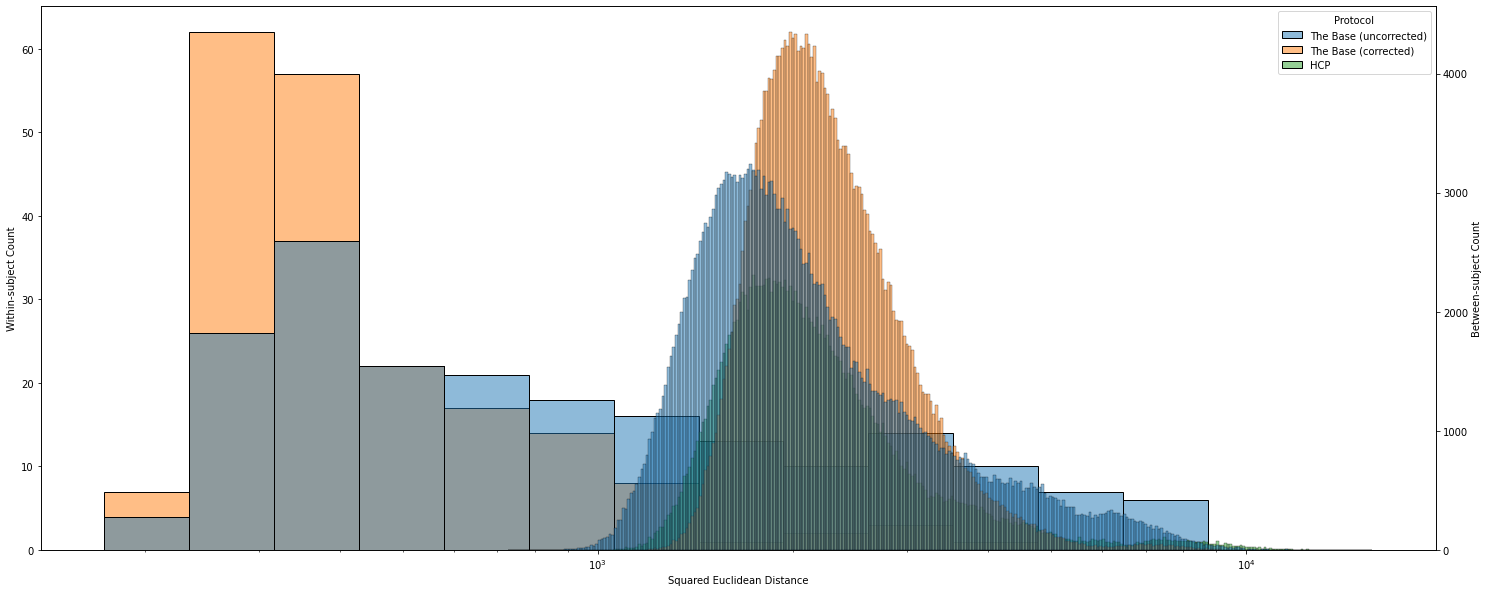

In [10]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(25, 10))
sns.histplot(data=differences[differences["Same Subject"]], x="Squared Euclidean Distance", hue="Protocol", ax=ax, log_scale=True, legend=False)
ax2 = plt.twinx()
ax.set(ylabel="Within-subject Count")
ax2.set(ylabel="Between-subject Count")
_ = sns.histplot(data=differences[~differences["Same Subject"].astype(bool)], x="Squared Euclidean Distance", hue="Protocol", ax=ax2, log_scale=True, legend=True)

## Classification

### Naive classifier

In [11]:
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

class SimpleThresholdClassifier(ClassifierMixin, BaseEstimator):
    """ An example classifier which implements a 1-NN algorithm.

    For more information regarding how to build your own classifier, read more
    in the :ref:`User Guide <user_guide>`.

    Parameters
    ----------
    demo_param : str, default='demo'
        A parameter used for demonstation of how to pass and store paramters.

    Attributes
    ----------
    X_ : ndarray, shape (n_samples, n_features)
        The input passed during :meth:`fit`.
    y_ : ndarray, shape (n_samples,)
        The labels passed during :meth:`fit`.
    classes_ : ndarray, shape (n_classes,)
        The classes seen at :meth:`fit`.
    """
    def __init__(self, threshold: float = None):
        self.threshold = threshold

    def fit(self, X, y):
        """A reference implementation of a fitting function for a classifier.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The training input samples.
        y : array-like, shape (n_samples,)
            The target values. An array of int.

        Returns
        -------
        self : object
            Returns self.
        """
        # Check that X and y have correct shape
        X, y = check_X_y(X, y, ensure_2d=False)
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)

        self.X_ = X
        self.y_ = y
        
        self.threshold = X[~y].min()
        # Return the classifier
        return self

    def predict(self, X):
        """ A reference implementation of a prediction for a classifier.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The input samples.

        Returns
        -------
        y : ndarray, shape (n_samples,)
            The label for each sample is the label of the closest sample
            seen during fit.
        """
        # Check is fit had been called
        check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        X = check_array(X, ensure_2d=False)
        return X < self.threshold


In [12]:
base_differences = differences[differences["Protocol"] == "The Base (corrected)"]

In [13]:
simple_estimator = SimpleThresholdClassifier()

In [20]:
X = base_differences["Squared Euclidean Distance"]
y = base_differences["Same Subject"]
_ = simple_estimator.fit(X, y)

In [21]:
y_predicted = simple_estimator.predict(X)

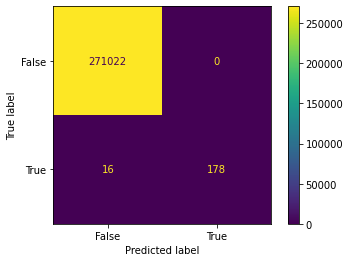

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(simple_estimator, X, y)

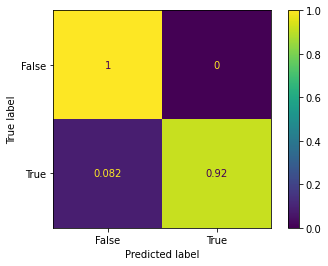

In [25]:
_ = ConfusionMatrixDisplay.from_estimator(simple_estimator, X, y, normalize="true")